# Data Mining - Homework 1 - PrefixSpan Algorithm Implementation

Student: Mohammad Sami ALEsh - Date: Thu 27/5/2021

#### Utils functions:

This function is used to calculate frequency for each item in the passed database

In [1]:
def calculate_items_frequency(db: list):
    frequency_dict = dict()
    for row in db:
        for item in set(row):
            if item in frequency_dict:
                frequency_dict[item] = frequency_dict[item] + 1
            else:
                frequency_dict[item] = 1
    return frequency_dict

This function returns two dictionaries: frequent items (which have support values greater than min_support) and infrequent items

In [2]:
def get_frequent_infrequent_items(items_dict: dict, min_support: int):
    frequent_items = dict()
    infrequent_items = dict()
    for k, v in items_dict.items():
        if v >= min_support:
            frequent_items[k] = v
        else:
            infrequent_items[k] = v
    return frequent_items, infrequent_items

This function removes infrequent items from passed database, and returns the cleaned one

In [3]:
def remove_infrequent_items_from_db(db: list, infrequent_dict: dict):
    new_db = list()
    infrequent_items = set(infrequent_dict.keys())
    for row in db:
        new_row = [item for item in row if item not in infrequent_items]
        if len(new_row) > 0:
            new_db.append(new_row)
    return new_db

This function projects the database according to the passed item

In [4]:
def project_db(db: list, projection_item: str):
    if projection_item == '':
        return db.copy()
    
    projected_db = list()
    for row in db:
        try:
            i = row.index(projection_item)
            p_row = row[i+1:]
            if len(p_row) != 0:
                projected_db.append(p_row)
        except:
            pass
    return projected_db

#### Visualization

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def get_colors_list(n: int):
    colors = list()
    base_colors = ['green','blue','purple','brown','teal', 'cyan']
    while len(colors) < n:
        needed_colors_cnt = n - len(colors)
        colors.extend(base_colors[:needed_colors_cnt])
    return colors

In [7]:
def plot_result(x_items, y_items, title= 'Title', x_label= 'X-Axis', y_label= 'Y-Axis'):
    plt.bar(x_items, y_items, color=get_colors_list(len(x_items)))
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation='vertical')
    plt.show()

#### PrefixSpan algorithm
##### Note: uncomment code below to log every step during excution

In [8]:
def PrefixSpan(db: list, min_support: int):
    def PrefixSpanCore(db: list, min_support: int, projection_item: str = '', previous_items: str = ''):
#         print('DB:')
#         for r in db:
#             print(''.join(r))
#         print(f'------- Projecting on /{projection_item}/ with previous /{previous_items}/ -----------')
        
        m_db = project_db(db, projection_item)
        
#         for r in m_db:
#             print(''.join(r))
        
        items_frequeny_dict = calculate_items_frequency(m_db)
        frequent_items, infrequent_items = get_frequent_infrequent_items(items_frequeny_dict, min_support)
        m_db = remove_infrequent_items_from_db(m_db, infrequent_items)
        
#         print(f'------- Removing infrequent {infrequent_items} -----------')
#         for r in m_db:
#             print(''.join(r))
        
        # Update patterns
        global patterns
        local_patterns = frequent_items.keys()
        for pattern in local_patterns:
            key = previous_items + '^' + pattern
            patterns[key] = frequent_items[pattern]
        
#         print(f'Local patterns: {local_patterns}')
#         print(f'Global patterns: {patterns}')
#         print('###############################################')
        
        # Recursive invoke
        for p in local_patterns:
            PrefixSpanCore(m_db, min_support, p, previous_items+p)
    
    PrefixSpanCore(db, min_support)    

## Simple Demo

In [9]:
# Init Data
sample_data = [
    ['C', 'A', 'G', 'A', 'A', 'G', 'T'],
    ['T', 'G', 'A', 'C', 'A', 'G'],
    ['G', 'A', 'A', 'G', 'T']
]

patterns = dict()
PrefixSpan(sample_data, min_support=3)

#### Note: i used '^' as separator character between items 😉

Patterns: {'^T': 3, '^G': 3, '^A': 3, 'G^A': 3, 'G^G': 3, 'GA^A': 3, 'GA^G': 3, 'GAA^G': 3, 'A^A': 3, 'A^G': 3, 'AA^G': 3}


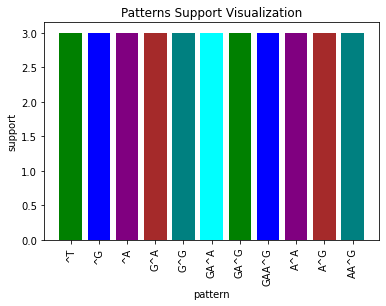

In [10]:
# Results:
print('Patterns:', patterns)
plot_result(patterns.keys(), patterns.values(), 'Patterns Support Visualization', 'pattern', 'support')

## Dataset Demo

In [11]:
import pandas as pd

In [12]:
paths_df = pd.read_csv('paths_finished.tsv', sep='\t')
paths_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51318 entries, 0 to 51317
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HashedIpAddress  51315 non-null  object 
 1   TimeStamp        51318 non-null  int64  
 2   Duration         51318 non-null  int64  
 3   path             51318 non-null  object 
 4   rating           28501 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.0+ MB


Seperate each row on comma (;)

In [13]:
paths_df['clean_path'] = paths_df['path'].apply(lambda x: x.split(';'))

In [14]:
dataset_data = paths_df['clean_path'].to_list()
patterns = dict()
PrefixSpan(dataset_data, min_support=1000)

#### Note: i used '^' as separator character between items 😉

Patterns:
 {'^Africa': 2738, '^Atlantic_Ocean': 1297, '^Europe': 4303, '^United_States': 8675, '^North_America': 1861, '^China': 1110, '^Science': 1479, '^<': 8995, '^Christianity': 1074, '^India': 1216, '^World_War_II': 2267, '^France': 1588, '^England': 3261, '^Periodic_table': 1394, '^English_language': 1414, '^United_Nations': 1050, '^Mammal': 1568, '^Bird': 1182, '^Germany': 1738, '^Earth': 3176, '^Animal': 1666, '^Internet': 1023, '^Computer': 1528, '^United_Kingdom': 3807, '^Russia': 1007, '^Plant': 1127, '^Asia': 1167, '^Human': 1604, '^Japan': 1070, '^Brain': 1316, '^Agriculture': 1147, '^Theatre': 1034, '^Zebra': 1041, '^Asteroid': 1171, '^Viking': 1192, '^Telephone': 1251, 'United_States^<': 1354, '<^<': 3900, '<<^<': 2174, '<<<^<': 1359, 'Brain^Telephone': 1043, 'Asteroid^Viking': 1043}


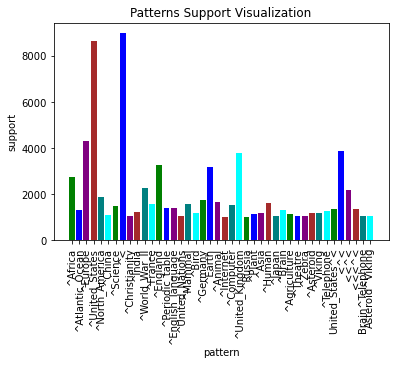

In [15]:
# Results:
print('Patterns:\n', patterns)
plot_result(patterns.keys(), patterns.values(), 'Patterns Support Visualization', 'pattern', 'support')

Top 5 patterns:

In [16]:
sort_patterns = sorted(patterns.items(), key=lambda x: x[1], reverse=True)
for tup in sort_patterns[:5]:
    print(f'pattern: /{tup[0]}/ ,support: {tup[1]}')

pattern: /^</ ,support: 8995
pattern: /^United_States/ ,support: 8675
pattern: /^Europe/ ,support: 4303
pattern: /<^</ ,support: 3900
pattern: /^United_Kingdom/ ,support: 3807
